###  Население городов России

###  Темы

Среднее и медиана 
как типичное наблюдение выборки

Логнормальное распределение


In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#  выбор темы картинок на Ваш вкус. Необязательная строчка.
#  matplotlib.style.use('ggplot')
#  Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

import os


In [2]:
import seaborn as sns


In [3]:
#  from scipy.stats import norm
#  from sklearn.preprocessing import StandardScaler
#  from scipy import stats
#  import warnings
#  warnings.filterwarnings('ignore')


In [4]:

os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_01/town_1959_2")

#   Население городов России в 1959 году
#   В тысячах человек
#   Город определяется по критериям 2000-го года

#   Импорт данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
# Полезные параметры:

#     sep -- задаёт символ-разделитель полей в файле (по умолчанию разделитель запятая);
#     names -- список названий колонок, если он не задан в файле;
#     index_col -- номер колонки с индексом.
#     decimal -- символ-разделитель для знаков после запятой.
#          decimal=b',',


town = pd.read_csv('town_1959_2.csv', encoding='cp1251', index_col=u'номер')
town.head()

,город,население
номер,,
1,Москва,5046.0
2,Санкт-Петербург,3003.0
3,Нижний_Новгород,941.0
4,Новосибирск,885.0
5,Самара,806.0


каково население типичного города россии в 1959 году?

типичный чек

определение типичного значения

In [5]:
print(town)

                 город  население
номер                            
1               Москва     5046.0
2      Санкт-Петербург     3003.0
3      Нижний_Новгород      941.0
4          Новосибирск      885.0
5               Самара      806.0
...                ...        ...
1 000      Усть-Илимск        0.5
1 001            Ясный        0.5
1 002           Мегион        0.4
1 003            Надым        0.3
1 004           Вуктыл        0.1

[1004 rows x 2 columns]


In [6]:
town.describe()

,население
count,1004.000000
mean,52.925199
std,204.885662
min,0.100000
25%,10.700000
50%,19.250000
75%,37.975000
max,5046.000000


In [7]:
#  Среднее значение равно 52.925199
#  Медиана равна  19.25
#  Что выбрать в качестве типичного значения?


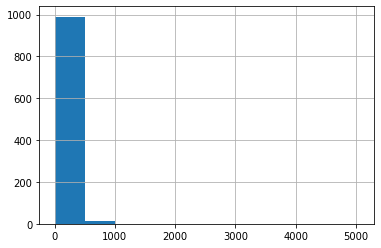

In [8]:
#  Гистограмма должна помочь. Она всегда помогает 
town[u'население'].hist()



In [12]:
#  Гистограмма всегда помогает, но в нашей задаче 
#  экстремальные значения слишком экстремальные 

#  Ничего не понятно: много городов с небольшим населением (меньше 500000)  
#  и мало городов с большим населением.

#  Может дело в выбросах?
#  Может выбросами являются Москва и Санкт-Петербург?
#  Повторим вычисления, исключив эти города.

town_2 = town.iloc[2:1004, 1]

town_2.describe()

count    1002.000000
mean       44.997904
std        91.645867
min         0.100000
25%        10.700000
50%        19.150000
75%        37.550000
max       941.000000
Name: население, dtype: float64

In [9]:
#  Среднее значение равно 44.997904
print("Среднее значение уменьшилось на",  (52.925199 - 44.997904)/52.925199*100)
print("Медиана уменьшилось с 19.25  до  19.15")
#  Что выбрать в качестве типичного значения?


Среднее значение уменьшилось на 14.978299845410126
Медиана уменьшилось с 19.25  до  19.15


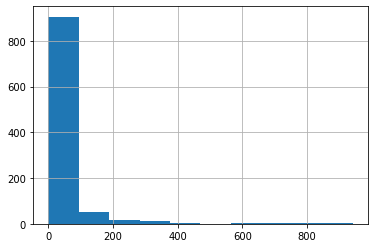

In [10]:
town_2[u'население'].hist()

#  Снова выбросы! Сколько можно!
#  Теперь будем удалять Нижний_Новгород,Новосибирск и Самару
#  Так выбросы будем удалять бесконечно.
#  Распределение похоже на логнормальное...


In [11]:
#  Какой процент наблюдений меньше среднего изначально?

len(town[town['население'] < 52.925199])/len(town)*100

82.37051792828686

In [12]:
#  Интересно, насколько стало лучше после отбрасывания выбросов.

len(town_2[town_2['население'] < 44.997904])/len(town_2)*100

78.84231536926147

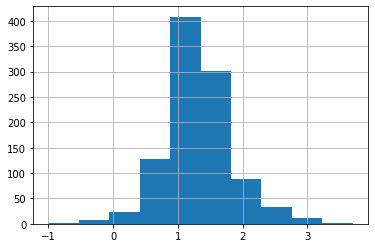

In [13]:
#  График не помог. Что делать?
#  Распределение похоже на логнормальное...

#  Построим гистограмму для логарифмов значений

x = np.log10(town[u'население'])
pd.Series(x).hist()

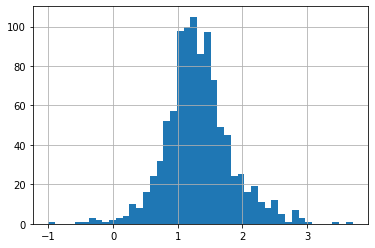

In [23]:
#  Повторим, увеличив число столбцов
pd.Series(x).hist(bins=45)

In [ ]:
#  где выбросы?
#  Сколько их?

#  Нижний Новгород уже не выброс!

#  Является ли распределение нормальным?
#  Об этом поговорим в теме "проверка статистических гипотез"

#  Можно ли говорить, 
#  что распределение несущественно отличается от нормального?



In [ ]:
Добавить
rug
нормальная плотность
